**Table of contents**<a id='toc0_'></a>    
- [U.S. Gun Ownership Data Project](#toc1_)    
  - [Install required packages](#toc1_1_)    
  - [Import gun ownership dataset and save dataframe as csv](#toc1_2_)    
  - [Extract and prepare data necessary to create gun ownership visualization](#toc1_3_)    
  - [Create gun ownership visualization](#toc1_4_)    
  - [Import burglary dataset](#toc1_5_)    
  - [Create visualization displaying U.S. home burglary rates](#toc1_6_)    
  - [Create visualization comparing U.S. home gun ownership rate to home burglary rates.](#toc1_7_)    
  - [Inspect Datasets containing information about Firearm Deaths Suicides](#toc1_8_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[U.S. Gun Ownership Data Project](#toc0_)
This R project examined household gun ownership in the United States and if there was any benefit to having a gun within the home. 

## <a id='toc1_1_'></a>[Install required packages](#toc0_)

This script installs the required R packages for this project which includes dplyr, and RCurl.


In [11]:
source("../src/packages.r")

## <a id='toc1_2_'></a>[Import gun ownership dataset and save dataframe as csv](#toc0_)

The dataset for this project was downloaded from https://www.rand.org/content/dam/rand/pubs/tools/TL300/TL354/RAND_TL354.database.zip. The file was then cleaned and saved in csv format. This script reads the csv and creates a dataframe for further examination.

In [12]:
source("../src/data/create_df_rand.r", echo = TRUE)


> data <- read.csv("../data/interim/TL_354_State_Level_Estimates_of_Household_Firearm_Ownership.csv")

> rand_df <- data %>% select(FIP, Year, STATE, HFR, 
+     Fem_FS_S, Male_FS_S)

> write.csv(rand_df, "../data/processed/rand_gun_ownership.csv")


## <a id='toc1_3_'></a>[Extract and prepare data necessary to create gun ownership visualization](#toc0_)


In [13]:
source("../src/data/gun_ownership.r", echo = TRUE)


> options(stringsAsFactors = FALSE)

> hfr_per_year <- aggregate(rand_df$HFR, list(rand_df$Year), 
+     FUN = mean)

> colnames(hfr_per_year) <- c("year", "hfr")

> hfr_per_year
   year     hfr
1  1980 0.50476
2  1981 0.50164
3  1982 0.51106
4  1983 0.48700
5  1984 0.50634
6  1985 0.49472
7  1986 0.48124
8  1987 0.50138
9  1988 0.50614
10 1989 0.52068
11 1990 0.50864
12 1991 0.50644
13 1992 0.49044
14 1993 0.49478
15 1994 0.47946
16 1995 0.47674
17 1996 0.45430
18 1997 0.43372
19 1998 0.43036
20 1999 0.41604
21 2000 0.42748
22 2001 0.38746
23 2002 0.39966
24 2003 0.38286
25 2004 0.39394
26 2005 0.38722
27 2006 0.37966
28 2007 0.38172
29 2008 0.38500
30 2009 0.38506
31 2010 0.37860
32 2011 0.38540
33 2012 0.40710
34 2013 0.39012
35 2014 0.37782
36 2015 0.36512
37 2016 0.39696


## <a id='toc1_4_'></a>[Create gun ownership visualization](#toc0_)

This code plots the gun ownership data and stylizes the plotted data.


> options(repr.plot.width = 9, repr.plot.height = 5)

> ggplot(hfr_per_year, aes(year, hfr)) + geom_line(aes(color = (hfr))) + 
+     geom_point(aes(color = (hfr), size = 2)) + annotate("text", 
+     x = .... [TRUNCATED] 


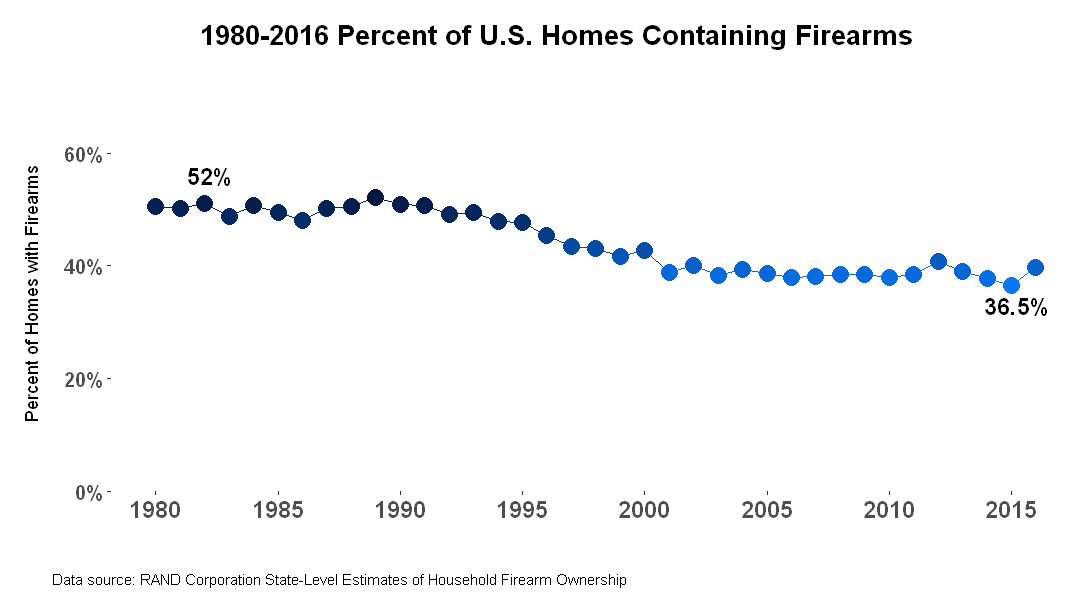

In [14]:
source("../src/visualization/gun_ownership_plot.r", echo = TRUE)

## <a id='toc1_5_'></a>[Import burglary dataset](#toc0_)

In [15]:
source("../src/data/burglary.r", echo = TRUE)


> prop_crime_data <- read.csv("../data/interim/rate_of_ property_victimizations_by_crime_type_1993_2021.csv")

> prop_crime_data <- prop_crime_data %>% select(year, 
+     crime_type, number, rate_per_1000_households)

> write.csv(prop_crime_data, "../data/processed/prop_crime.csv")


## <a id='toc1_6_'></a>[Create visualization displaying U.S. home burglary rates](#toc0_)


> burglary <- subset(prop_crime_data, crime_type == 
+     "Burglary" & year >= 1995 & year <= 2016)

> burglary$rate_per_1000_households <- burglary$rate_per_1000_households/100

> burglary
   year crime_type    number rate_per_1000_households
32 1995   Burglary 4,042,606                    0.398
33 1996   Burglary 4,017,814                    0.391
34 1997   Burglary 3,783,231                    0.364
35 1998   Burglary 3,376,416                    0.321
36 1999   Burglary 3,037,883                    0.283
37 2000   Burglary 2,817,066                    0.260
38 2001   Burglary 2,643,251                    0.241
39 2002   Burglary 2,518,181                    0.228
40 2003   Burglary 2,797,350                    0.245
41 2004   Burglary 2,759,594                    0.238
42 2005   Burglary 2,859,803                    0.244
43 2006   Burglary 2,690,635                    0.228
44 2007   Burglary 2,494,145                    0.209
45 2008   Burglary 2,381,444                    0.19

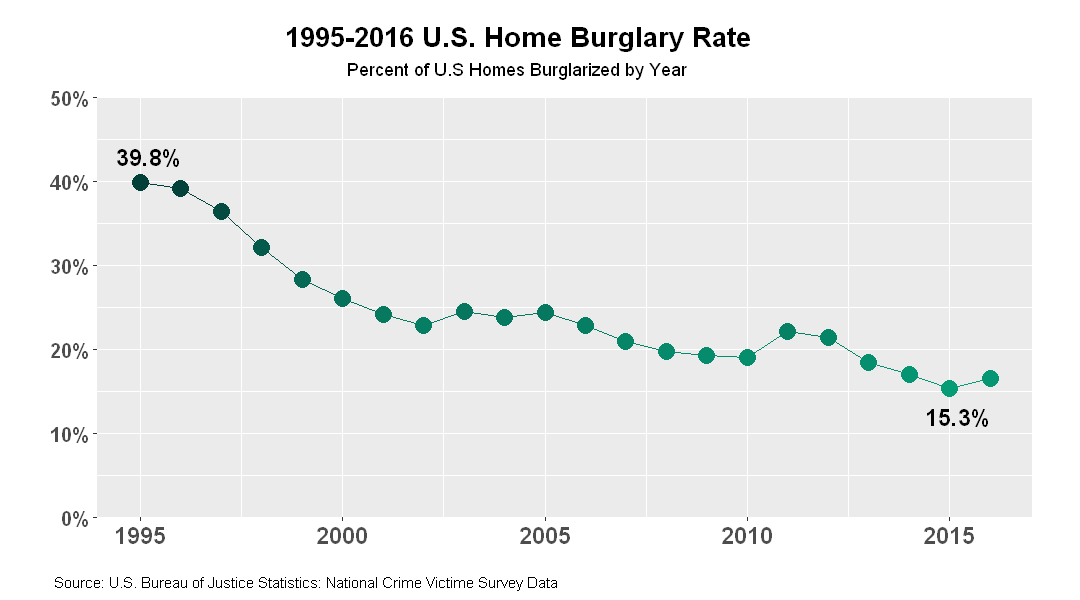

In [16]:
source("../src/visualization/burglary_plot.r", echo = TRUE)

## <a id='toc1_7_'></a>[Create visualization comparing U.S. home gun ownership rate to home burglary rates.](#toc0_)


> gun_ownership <- subset(hfr_per_year, hfr & year >= 
+     1995 & year <= 2016)

> cols <- c("#45495a", "#7581ad")

> ggplot() + geom_area(data = gun_ownership, aes(x = year, 
+     y = hfr, fill = "#45495a")) + geom_area(data = burglary, 
+     aes(x = year, y = ra .... [TRUNCATED] 


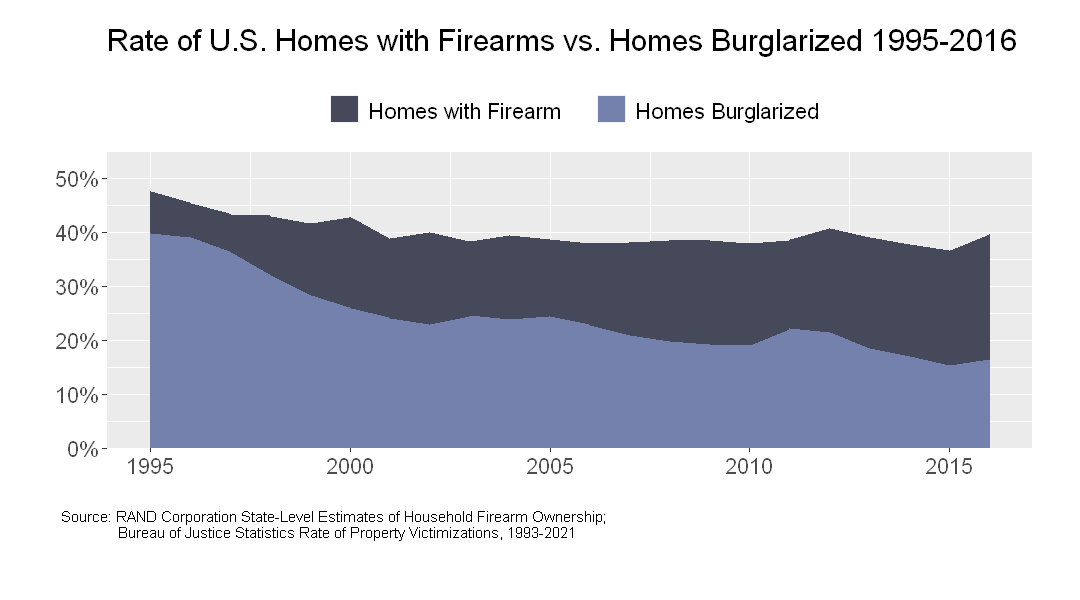

In [17]:
source("../src/visualization/burglary_vs_gun_plot.r", echo = TRUE)

## <a id='toc1_8_'></a>[Inspect Datasets and Create Visualizations for Firearm Deaths Suicides](#toc0_)


> homicide <- read.csv(file = "../data/interim/cause_of_death_home_homicide_2000_2020.csv")

> suicide <- read.csv(file = "../data/interim/cause_of_death_home_suicide_2000_2020.csv")

> hom <- ggplot() + geom_line(data = homicide, aes(year, 
+     h)) + labs(title = "Homicide by Firearm") + theme(axis.title.y = element_blank(), 
+   .... [TRUNCATED] 

> sui <- ggplot() + geom_line(data = suicide, aes(year, 
+     s)) + labs(title = "Suicide by Firearm") + theme(axis.title.y = element_blank(), 
+     .... [TRUNCATED] 

> ggarrange(hom, sui) + labs(title = "2000-2020 Firearm Homicides & Suicides", 
+     subtitle = "Decedent's Home Location of Death", caption = "Sourc ..." ... [TRUNCATED] 


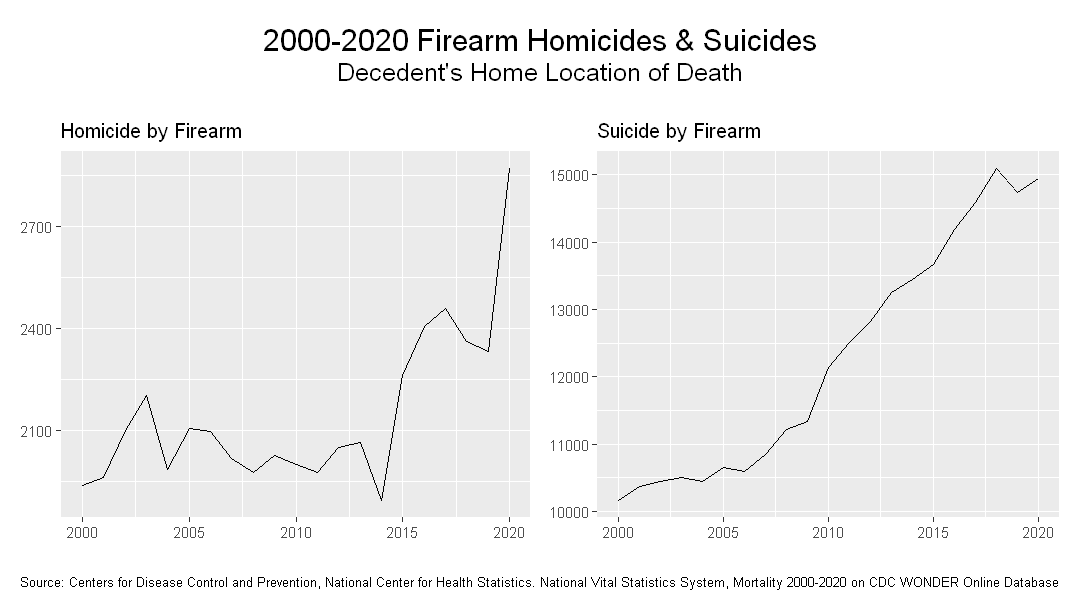

In [18]:
source("../src/visualization/homicide_vs_suicide_plots.r", echo = TRUE)